<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/bi-2022/blob/main/notebooks/bi-1-sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%load_ext rpy2.ipython

Ćwiczymy programowanie symulacji komputerowych na potrzeby projektu z Badań Internetowych.

1. Ćwiczymy losowanie proste w języku R

In [3]:
%%R
set.seed(123)
sample(x = 1:5, size = 3)

[1] 3 2 5


2. Ćwiczenie losowanie z nierównymi prawdopodbieństwami


In [5]:
%%R
set.seed(123)
sample(x = 1:5,
       size = 3,
       prob = c(0.1, 0.1, 0.1, 0.3, 0.4))

[1] 5 2 4


3. Symulacja polega na tym, że losujemy 1000 razy wektor 3 elementowy z 5 elementowego z prawdopodbieństwami okreslonymi w zadaniu 2


In [6]:
%%R
set.seed(123)
N <- 1000
wynik <- matrix(data = 0, nrow = N, ncol = 3)

for (i in 1:N) {
  wynik[i,] <- sample(x = 1:5,
                      size = 3,
                      prob = c(0.1, 0.1, 0.1, 0.3, 0.4))
}

head(wynik)

     [,1] [,2] [,3]
[1,]    5    2    4
[2,]    2    1    5
[3,]    4    1    5
[4,]    4    1    5
[5,]    4    3    5
[6,]    2    5    4


In [8]:
%%R
table(wynik[,1])/N


    1     2     3     4     5 
0.083 0.107 0.101 0.315 0.394 


Poniższe podejście jest nieprawidłowe bo, że macierz jest jednym wielkim wektorem!!!


In [9]:
%%R
prop.table(table(as.vector(wynik)))


        1         2         3         4         5 
0.1410000 0.1443333 0.1350000 0.2840000 0.2956667 


In [10]:
%%R
set.seed(123)

wynik2 <- replicate(N, {
  d <- sample(x = 1:5,
         size = 3,
         prob = c(0.1, 0.1, 0.1, 0.3, 0.4))
  d
})

In [12]:
%%R
dim(wynik2)

[1]    3 1000


Odtwarzmy symulację z artykułu Kim and Wang (2019)


         x1        x2       y1        y2        p1        p2
1 0.4395244 1.6399764 3.856908 2.4192128 0.8375317 0.3928873
2 0.7698225 0.8362165 2.224028 0.4906076 0.6976678 0.5441835
3 2.5587083 0.2214909 3.119574 1.6800052 0.5551475 0.7467867
4 1.0705084 0.6128547 3.090614 1.1828452 0.6485917 0.6135089
5 1.1292877 0.4650717 4.641065 2.7097784 0.6142166 0.6632927
6 2.7150650 1.1759146 5.217566 3.9557575 0.7642124 0.4599754


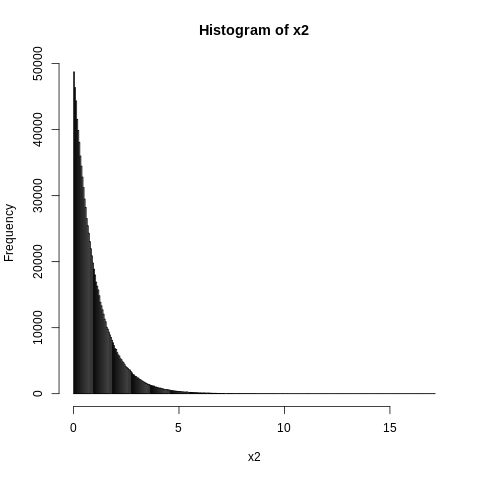

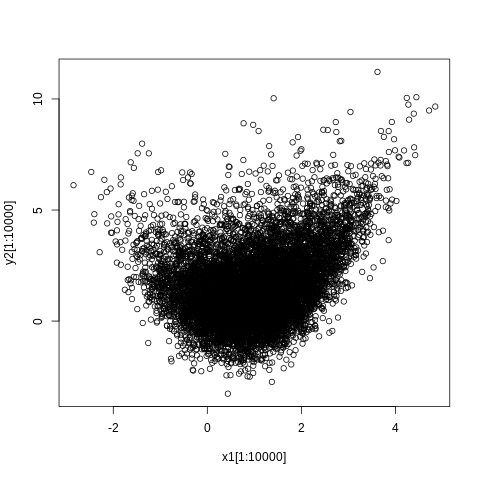

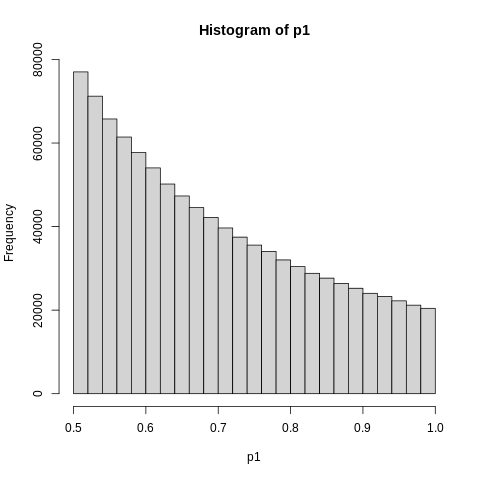

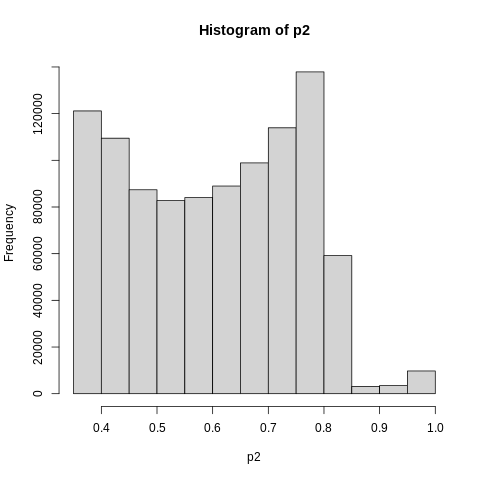

In [14]:
%%R
set.seed(123)
N <- 1e6 ## 1000000
x1 <- rnorm(n = N, mean = 1, sd = 1)
x2 <- rexp(n = N, rate = 1)
epsilon <- rnorm(n = N) # rnorm(N)
hist(x2, breaks = "scott")
y1 <- 1 + x1 + x2 + epsilon
y2 <- 0.5*(x1 - 0.5)^2 + x2 + epsilon
plot(x1[1:10000], y2[1:10000])
p1 <- exp(x2)/(1+exp(x2))
p2 <- exp(-0.5+0.5*(x2-2)^2)/(1+exp(-0.5+0.5*(x2-2)^2))
hist(p1)
hist(p2)
populacja <- data.frame(x1,x2,y1,y2,p1,p2)
head(populacja)

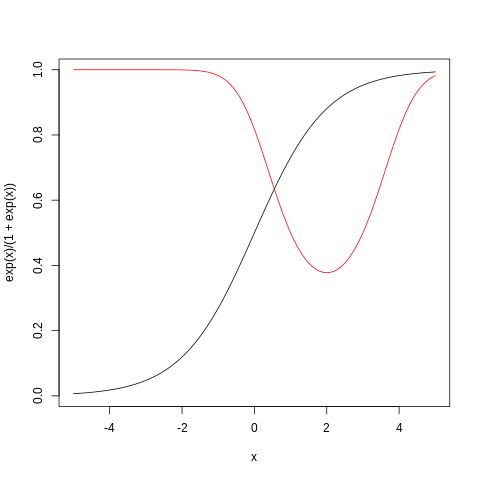

In [16]:
%%R
curve(expr = exp(x)/(1+exp(x)), 
      from = -5, to = 5)
curve(expr = exp(-0.5+0.5*(x-2)^2)/(1+exp(-0.5+0.5*(x-2)^2)), 
      from = -5, to = 5,
      add = TRUE,
      col = "red")

Losujemy dwie próby:
1. próba "big data"
2. próba losowa prosta

In [17]:
%%R
set.seed(123)
flag_bd1 <- rbinom(n = N, size = 1, prob = populacja$p1)
table(flag_bd1)

flag_bd1
     0      1 
306617 693383 


In [18]:
%%R
mean(populacja[flag_bd1 == 1, "y1"])

[1] 3.186211
